# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.


Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners          int64
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object 

0


<Axes: xlabel='Seats', ylabel='Density'>

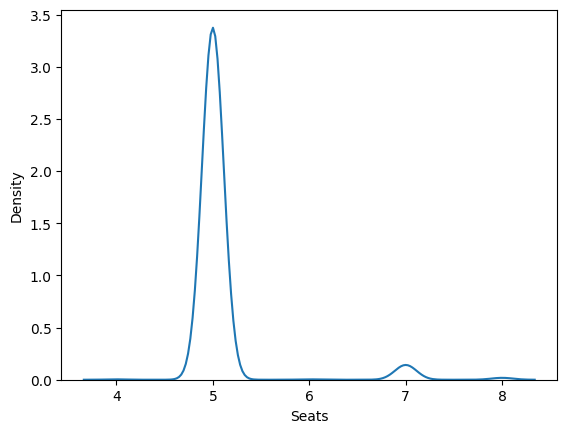

In [552]:
#Q1 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cars1 = pd.read_csv('/Users/borayadiul/Desktop/labs/04_hedonic_pricing/cars_hw.csv')
cars1.describe()
#print(cars1.dtypes, '\n')


cars1['No_of_Owners']=cars1['No_of_Owners'].replace('1st', '1')
cars1['No_of_Owners']=cars1['No_of_Owners'].replace('2nd', '2')
cars1['No_of_Owners']=cars1['No_of_Owners'].replace('3rd', '3')
cars1['No_of_Owners'] = pd.to_numeric(cars1['No_of_Owners'])
#cars1.head()
print(cars1.dtypes, '\n')
cars1 = cars1.rename(columns = {'Seating_Capacity': "Seats", "No_of_Owners": "Num_Owners", "Mileage_Run" : "Mileage"})
cars1.head()

cars2 = cars1.loc[:,['Make', "Make_Year", "Color", "Body_Type", "Mileage", "Num_Owners", "Seats", "Fuel_Type", "Transmission","Transmission_Type", "Price"]]
cars2.head()

print(cars2.isnull().values.any().sum())

cars2.describe()

sns.kdeplot(data=cars2, x='Seats')


<Axes: xlabel='Num_Owners', ylabel='Density'>

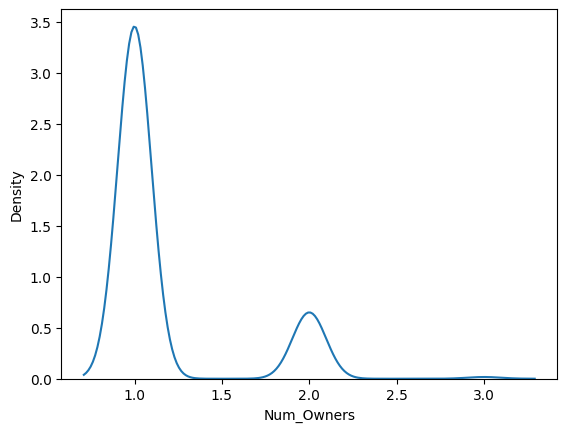

In [553]:
sns.kdeplot(data=cars2, x='Num_Owners')


<Axes: xlabel='Make_Year', ylabel='Density'>

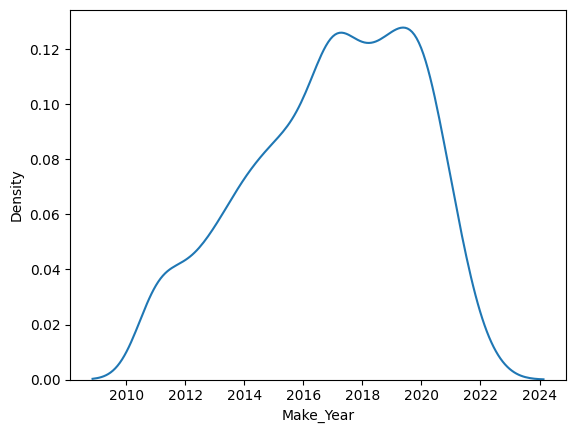

In [554]:
sns.kdeplot(data=cars2, x='Make_Year')

<Axes: xlabel='Mileage', ylabel='Density'>

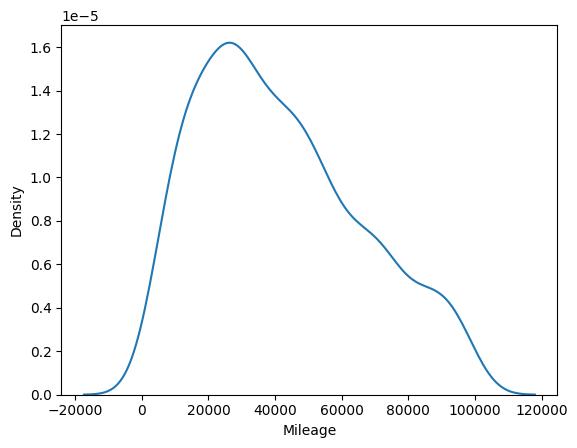

In [555]:
sns.kdeplot(data=cars2, x='Mileage')

<Axes: xlabel='Price', ylabel='Density'>

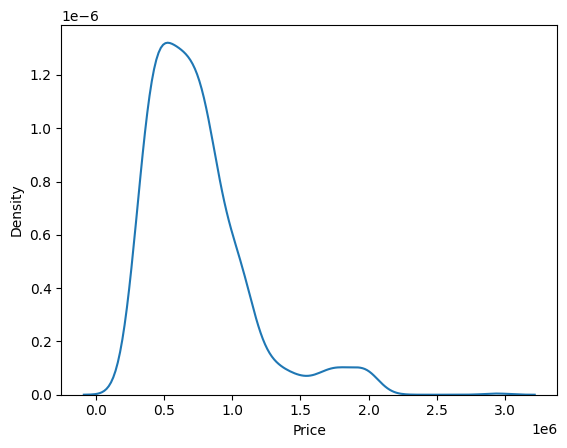

In [556]:
sns.kdeplot(data=cars2, x='Price')

/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_54564/3265922160.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=cars2, x='Make_Year', hue = "Make")


<Axes: xlabel='Make_Year', ylabel='Density'>

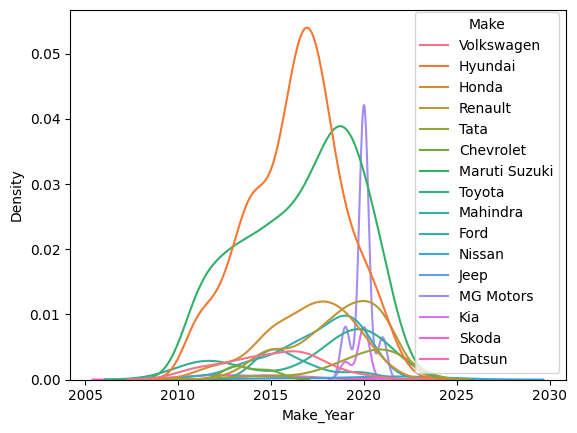

In [557]:
sns.kdeplot(data=cars2, x='Make_Year', hue = "Make")

In [558]:
cars2.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


<Axes: xlabel='Mileage', ylabel='Price'>

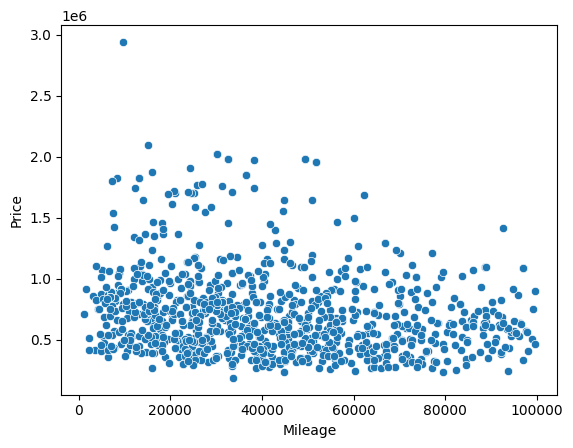

In [559]:
sns.scatterplot(x=cars2['Mileage'],y=cars2['Price'])

<Axes: >

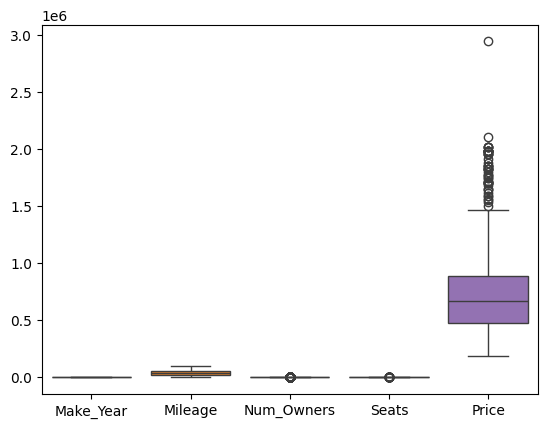

In [560]:
sns.boxplot(data=cars2)

In [561]:
cars2.head()

,Make,Make_Year,Color,Body_Type,Mileage,Num_Owners,Seats,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


In [579]:
# Q2 

make_dum = pd.get_dummies(cars2['Make'])
color_dum = pd.get_dummies(cars2['Color'])
body_dum = pd.get_dummies(cars2['Body_Type'])
fuel_dum = pd.get_dummies(cars2['Fuel_Type'])
transmis_dum = pd.get_dummies(cars2['Transmission'])
transmisType_dum = pd.get_dummies(cars2['Transmission_Type'])

cars2['Mileage_arcsin'] = np.arcsinh(cars2['Mileage'])
cars2['Price_arcsin'] = np.arcsinh(cars2['Price'])
cars2.head()


#X = pd.concat([make_dum,color_dum,body_dum,fuel_dum,transmis_dum,transmisType_dum,cars2],axis=1)
X.head()
#list(X.columns)

Y = cars2['Price']
X = cars2.loc[:, ['Mileage', 'Body_Type', 'Make_Year', 'Transmission_Type', 'Seats', "Make", "Price", "Mileage_arcsin", "Num_Owners"]]



3. Implement an ~80/~20 train-test split. Put the test data aside.


In [563]:
#Q3
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Y = cars2['Price']
X = cars2.loc[:, ['Mileage', 'Body_Type', 'Make_Year', 'Transmission_Type', 'Seats']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=100)

L_train = len(y_train)
L_test = len(y_test)



4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?


In [564]:
#Q4 
from sklearn.linear_model import LinearRegression

C_train = pd.concat([X_train["Mileage"],X_train["Make_Year"],pd.get_dummies(X_train['Body_Type'], dtype='int'), pd.get_dummies(X_train['Transmission_Type'],dtype='int')],  axis = 1)
C_test = pd.concat([X_test["Mileage"],X_test["Make_Year"],pd.get_dummies(X_test['Body_Type'], dtype='int'), pd.get_dummies(X_test['Transmission_Type'],dtype='int')],  axis = 1)

reg = LinearRegression(fit_intercept=False).fit(C_train, y_train)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})

y_hat = reg.predict(C_test)
print('R-squared: ', reg.score(C_test, y_test)) 

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results


R-squared:  0.6494796259326348
RMSE:  219384.76582353507


,variable,coefficient
0,Mileage,-9.471889e-02
1,Make_Year,5.034212e+04
2,crossover,-2.887584e+07
3,hatchback,-2.897749e+07
4,muv,-2.894977e+07
5,sedan,-2.872284e+07
6,suv,-2.844800e+07
7,Automatic,-7.196554e+07
8,Manual,-7.200839e+07


In [565]:
#Q4 
from sklearn.linear_model import LinearRegression

F_train = pd.concat([X_train["Mileage"], pd.get_dummies(X_train['Transmission_Type'],dtype='int')],  axis = 1)
F_test = pd.concat([X_test["Mileage"], pd.get_dummies(X_test['Transmission_Type'],dtype='int')],  axis = 1)

reg1 = LinearRegression(fit_intercept=False).fit(F_train, y_train) # Fit the linear model
results = pd.DataFrame({'variable':reg1.feature_names_in_, 'coefficient': reg1.coef_}) # Regression coefficients

y_hat = reg1.predict(F_test)
print('R-squared: ', reg1.score(F_test, y_test)) # R squared measure

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results

R-squared:  0.05047951011324625
RMSE:  361078.8111571295


,variable,coefficient
0,Mileage,-2.484690
1,Automatic,936138.624781
2,Manual,805854.608598


**Q4**

When looking at the models that I created, it seems that they both did relatively poorly. I would say that the first model, with Mileage, Make_Year, Body_Type, and Tranmission_Type did better than the model with just Mileage and Tranmission_Type as it did have a lower RMSE (219,384.00) meaning it may be slighty better model and it had a higher R-sqaure  (0.649) indicating a better model fit. 

5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?


In [570]:
#X = X.drop(["MileXBody","TransmisstypeXbody","TransmisstypeXfuel","TransmisstypeXseats","Num_ownXseats","Num_ownXfuel","TransmissTypeXmileArc","TransmissTypeXFuel","Num_OwnXMake","Num_OwnXseats"], axis =1)
#X = X.drop(['Chevrolet','Datsun','Ford','Honda','Hyundai','Jeep','Kia','MG Motors','Mahindra','Maruti Suzuki'], axis =1)
#X = X.drop(['Nissan','Renault','Skoda','Tata','Toyota','Volkswagen','beige','black','blue','bronze'], axis =1 )
#X = X.drop(['brown','golden','green','grey','maroon','orange','purple','red','silver','white'], axis = 1)
#X = X.drop(['yellow','crossover','hatchback','muv','sedan','suv','diesel','petrol','petrol+cng','4-Speed','5-Speed','6-Speed','7-Speed','CVT','Automatic','Manual'], axis = 1)
X

,Mileage,Body_Type,Make_Year,Transmission_Type,Seats,Make
0,44611,sedan,2017,Automatic,5,Volkswagen
1,20305,crossover,2016,Manual,5,Hyundai
2,29540,suv,2019,Manual,5,Honda
3,35680,hatchback,2017,Manual,5,Renault
4,25126,hatchback,2017,Manual,5,Hyundai
...,...,...,...,...,...,...
971,23869,sedan,2018,Automatic,5,Hyundai
972,14831,sedan,2019,Automatic,5,Hyundai
973,52846,sedan,2014,Automatic,5,Hyundai
974,28335,crossover,2020,Automatic,5,Ford


In [581]:
Ignore = X["Make_Year"]
Ignore = Ignore.replace([2011, 2012,2013,2014,2015,2016], "Older")
X["Make_Year1"] = Ignore
Ignore2 = Ignore.replace([2017, 2018,2019,2020,2021,2022], "Newer")
X["Make_Year1"] = Ignore2
X['Make_Year1'].value_counts()

Ignore_make = X["Make"]
Ignore_make = Ignore_make.replace(["Jeep", "Datsun",'Nissan',"Skoda","Chevrolet","Kia", "Mahindra","Tata"], "less_rel")
X["Make1"] = Ignore_make
X

,Mileage,Body_Type,Make_Year,Transmission_Type,Seats,Make,Price,Mileage_arcsin,Num_Owners,Make_Year1,Make1
0,44611,sedan,2017,Automatic,5,Volkswagen,657000,11.398883,1,Newer,Volkswagen
1,20305,crossover,2016,Manual,5,Hyundai,682000,10.611770,1,Older,Hyundai
2,29540,suv,2019,Manual,5,Honda,793000,10.986648,2,Newer,Honda
3,35680,hatchback,2017,Manual,5,Renault,414000,11.175493,1,Newer,Renault
4,25126,hatchback,2017,Manual,5,Hyundai,515000,10.824806,1,Newer,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...
971,23869,sedan,2018,Automatic,5,Hyundai,956000,10.773483,1,Newer,Hyundai
972,14831,sedan,2019,Automatic,5,Hyundai,1027000,10.297622,1,Newer,Hyundai
973,52846,sedan,2014,Automatic,5,Hyundai,736000,11.568284,1,Older,Hyundai
974,28335,crossover,2020,Automatic,5,Ford,749000,10.945000,2,Newer,Ford


In [582]:
#Q5 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y1 = X['Price']
X['Make1XMake_Year1'] = X['Make1'].astype('str')+'X'+X['Make_Year1'].astype('str')
x1 = X.loc[:,['Mileage_arcsin', 'Make1XMake_Year1', 'Num_Owners'] ]


X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=.2, random_state=100)
R_train = pd.concat([X_train['Mileage_arcsin'],X_train['Num_Owners'],  pd.get_dummies(X_train['Make1XMake_Year1'],dtype='int')],  axis = 1)
R_test = pd.concat([X_test['Mileage_arcsin'],X_test['Num_Owners'], pd.get_dummies(X_test['Make1XMake_Year1'],dtype='int')],  axis = 1)
#R_train1 = R_train.drop(['ChevroletXOlder','DatsunXNewer','KiaXNewer','MahindraXNewer','NissanXNewer','NissanXOlder','SkodaXNewer','SkodaXOlder'], axis = 1)
#R_train1 = R_train1.drop(['DatsunXOlder','JeepXNewer','MahindraXOlder','TataXNewer','TataXOlder'], axis = 1)
R_test1 = R_test.drop(['less_relXNewer', 'less_relXOlder'], axis = 1)
reg5 = linear_model.LinearRegression(fit_intercept=False).fit(R_train1,y_train)
y_hat5 = reg5.predict(R_test1)
print('Rsq: ', reg5.score(R_test1,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat5)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg5.feature_names_in_, 'coefficient': reg5.coef_})
results

Rsq:  0.6378393235901442
RMSE:  222997.749289964


,variable,coefficient
0,Mileage_arcsin,98004.923028
1,Num_Owners,-48020.434846
2,FordXNewer,-234950.442743
3,FordXOlder,-454574.332680
4,HondaXNewer,-51062.192449
5,HondaXOlder,-489638.403509
6,HyundaiXNewer,-191531.168254
7,HyundaiXOlder,-521704.227412
8,MG MotorsXNewer,849946.630809
9,Maruti SuzukiXNewer,-326256.760071


**Q5**

When looking at the more complex model, it has a higher R-squared value than the second model I made in question 4 pertaining to how mileage and transmission type influnce car prices. Conversely, it has a slightly lower R-squared value than the first model I made in question 4 pertaining to how mileage, make year, body type, and transmission type. This suggest that the complex model has a better fit compared to the second model in question 4 but it has a slightly worse fit than the first model in question 4.  Similarly, this more complex model had a higher RMSE value compared to the first model in question 4 but it has a lower RMSE value compared to the second model in question 4. This suggest that the complex model has worse accuracy compared to the first model in question 4 but has a better accuracy compared to the second model in question 4. 

6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?


**Q6**

When looking at the results from questions 1-5, I see that viewing the overall distribution of the data and variables provides insight on if any variables need to be transform for a better distribution and regression results. Following this, creating a 80/20 split also provides a way to simulate testing the regression on novel data, which ensures that the model is properly calibrate for regression across different variations of the data. Further, questions 4-5 helped me see how adding or removing variables in a regression model will either be benefical or harmful therefore steps must be taken to analyze various variable combinations to see which ones should really be considered for the final regression model. Addtionally, the use of interactions can reveal another side of the data and regression that may have otherwise been overlooked. I have learned that overfitting the data can occur by overloading the model with too many explanatory variables or interaction terms that are may have exhibit multicollinearity. Underfitting the data can occur by not chosing the proper explanatory variables or adequate number of variables, which I learned as I was going through question 4. 
In order to have a good regression model, variables should be transformed as necessary and the explanatory variables should be focus on which variable may acutally have a considerable effect on the response outcome to ensure that the model properly fits and conveys data in a way that is meaningful and makes sense.

7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

